#### Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")




from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#### Reading dataset

In [46]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Basic analysis of dataset<br>
We have 6 input features ( age, sex, bmi, number of children, smoker or not, and region of living) and 1 output feature i.e. charges of medical insurance.

#### Basic Exploration of the dataset

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Creating list of numerical and categorical features

In [49]:

duplicate = data[data.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [50]:
data = data.drop_duplicates()


#### Chccking for null values

In [51]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### creating input and output features

In [83]:
data["charges"] = np.log(data["charges"])

In [84]:
x=data.drop(["charges"], axis=1)
y=data["charges"]

In [85]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [86]:
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

#### Checking for Outliers

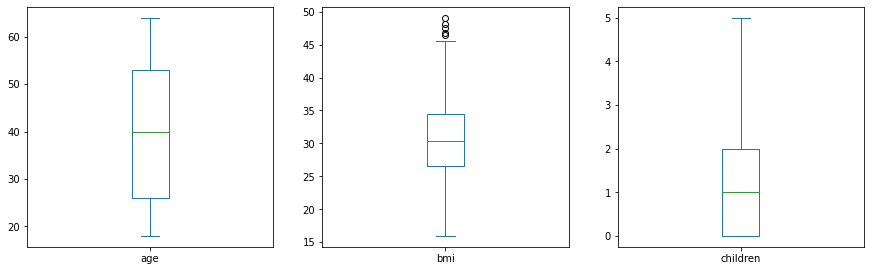

In [87]:
x.plot(kind="box", subplots=True, layout=(3,3), figsize=(15,15));

From the above diagrams, we can say that, BMI features has some outliers. To remove is we will apply IQR method.

In [88]:
column_int=[]
column_obj=[]
for col in x:
    dataTypeObj = x.dtypes[col]
    if dataTypeObj == np.int64 or dataTypeObj == np.float64 :
        column_int.append(col)
    if dataTypeObj== np.object:
        column_obj.append(col)

In [89]:
column_int

['age', 'bmi', 'children']

In [90]:
column_obj

['sex', 'smoker', 'region']

In [91]:
for i in column_int:
    Q3=np.percentile(x[i], 75)
    Q1=np.percentile(x[i], 25)
    IQR=Q3-Q1
    UB=Q3+(1.5*IQR)
    LB=Q1-(1.5*IQR)

    x[i]=x[i].apply(lambda x:UB if x>UB else x)
    x[i]=x[i].apply(lambda y:LB if y<LB else y)

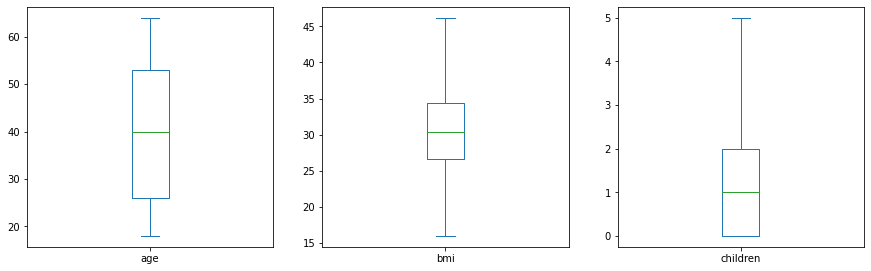

In [92]:
x.plot(kind="box", subplots=True, layout=(3,3), figsize=(15,15));

Before encoding any categorical features, lets check for feature importance

In [93]:
x["sex"].unique()

array(['female', 'male'], dtype=object)

In [94]:
x["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [95]:
x["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [96]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
496,31,female,23.600,2,no,southwest
497,45,male,28.700,2,no,southwest
498,44,female,23.980,2,no,southeast
499,62,female,39.200,0,no,southwest


In [97]:
#x["sex"]= x["sex"].map({"female":1, "male":2})
#x["smoker"]=x["smoker"].map({"yes":1, "no":2})
#x["region"]=x["region"].map({"southwest":1, "southeast":2, "northwest":3, "northeast":4})
x=pd.get_dummies(x,drop_first=True)



x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


[0.40413236 0.07953489 0.03928089 0.01543043 0.4307666  0.00640474
 0.01412072 0.01032937]
Plotting graph of feature importances for better visualization


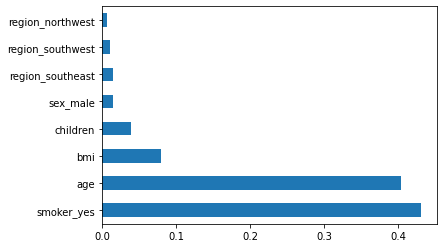

______________________________________________________________________
Getting importance of all features in descending order as a dataframe
______________________________________________________________________


,Features,Importance
4,smoker_yes,0.430767
0,age,0.404132
1,bmi,0.079535
2,children,0.039281
3,sex_male,0.015430
6,region_southeast,0.014121
7,region_southwest,0.010329
5,region_northwest,0.006405


In [98]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x, y)


print(model.feature_importances_)



#plot graph of feature importances for better visualization
print("Plotting graph of feature importances for better visualization")
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(x.shape[1]).plot(kind='barh')
plt.show()

print("_"*70)
#Getting importance of all features in descending order as a dataframe
print("Getting importance of all features in descending order as a dataframe")
print("_"*70)
feat_importances.sort_values(ascending=False)
feature_df=feat_importances.to_frame()
DF=feat_importances.reset_index().rename(columns={"index":"Features", 0:"Importance"})
DF=DF.sort_values(by=['Importance'], ascending=False)
display(DF)

From the above observation, we can say that, region_northwest, region_southeast and region_southwest features have the least and almost negligible values. So we can drop them.

In [99]:
x.drop(["region_southwest", "region_southeast", "region_northwest"], inplace=True, axis=1)
x.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


#### Scaling the data

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(x)
X_scaled=scaler.fit_transform(x)

#### Checking distribution of output feature

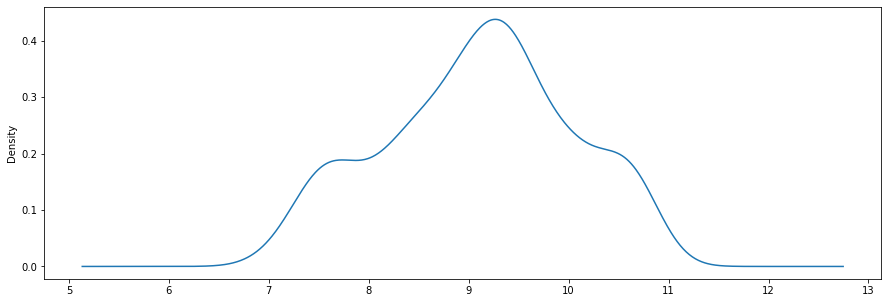

In [101]:
y.plot(kind='kde', figsize=(15,5));

#### Train Test Split

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

print("Shape of X train:",X_train.shape)
print("Shape of Y train:",y_train.shape)
print("Shape of X test:",X_test.shape)
print("Shape of Y test:",y_test.shape)

Shape of X train: (335, 5)
Shape of Y train: (335,)
Shape of X test: (166, 5)
Shape of Y test: (166,)


## Regression Model

Definig model evolution metrics

In [103]:
def model_evaluate(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MAE is {}'.format(round(mae, 3)))
    print('MSE is {}'.format(round(mse, 3)))
    print('R2 score is {}'.format(round(r2, 3)))

### LINEAR REGRESSION

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Scores of Linear Regression:")
model_evaluate(y_test,y_pred_lr)

Scores of Linear Regression:
MAE is 0.276
MSE is 0.194
R2 score is 0.78


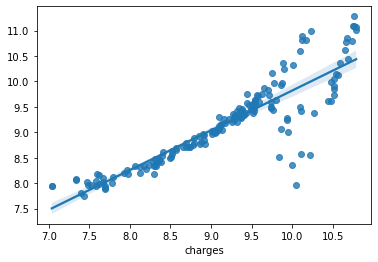

In [105]:
sns.regplot(x=y_test,y=y_pred_lr)
plt.show()

### DECISION TREE REGRESSOR

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred_dt)

Scores of DT Regression:
MAE is 0.289
MSE is 0.356
R2 score is 0.596


In [107]:
parameter={"max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
kf=KFold(n_splits=10)
grid_sv = GridSearchCV(dt, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_sv.fit(X_train, y_train)
print("Best classifier :", grid_sv.best_estimator_)

Best classifier : DecisionTreeRegressor(max_depth=6)


In [108]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
y_pred_DT=dt.predict(X_test)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred_DT)

Scores of DT Regression:
MAE is 0.241
MSE is 0.181
R2 score is 0.795


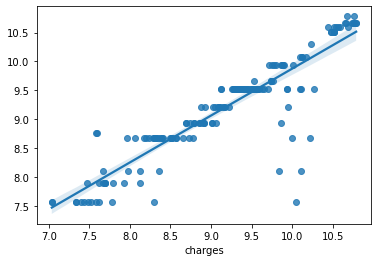

In [109]:
sns.regplot(x=y_test,y=y_pred_DT)
plt.show()

In [110]:
def all_regression_model(x, y):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
    
    print("Shape of X train:",X_train.shape)
    print("Shape of Y train:",y_train.shape)
    print("Shape of X test:",X_test.shape)
    print("Shape of Y test:",y_test.shape)
    print("-"*80)
    print("-"*80)
    
    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import GradientBoostingRegressor




    regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(n_estimators=100,random_state=1,n_jobs=-1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'Gradient Boost' : GradientBoostingRegressor()
    }
    results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
    for method,func in regressors.items():
        model = func.fit(X_train,y_train)
        pred = model.predict(X_test)
        results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                            np.round(mean_squared_error(y_test,pred),3),
                              np.round(r2_score(y_test,pred),3)
                             ]
    
    
    display(results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score']))    

In [111]:
all_regression_model(X_scaled, y)

Shape of X train: (335, 5)
Shape of Y train: (335,)
Shape of X test: (166, 5)
Shape of Y test: (166,)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


,MAE,MSE,R2-score
Gradient Boost,0.224000,0.162000,0.817000
Linear Regression,0.276000,0.194000,0.780000
Random Forest,0.230000,0.197000,0.777000
K-nearest Neighbors,0.297000,0.334000,0.622000
Decision Tree,0.286000,0.360000,0.593000
